--- 
- total_sales를 100점 만점으로 환산하여 loyalty score 산출하고, 분포 확인 (--> 현업의 등급설계 지원용도)
- 보정된 total_sales를 0~1사이의 값의로 변환한 후, x 100 
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

In [2]:
df = pd.read_csv('data/output.csv', encoding = 'euc-kr')
df.shape

(8230, 26)

In [3]:
## loyalty score 산출
df_scored = df.copy()
df_scored['loyalty_score'] = (df['tot_sales'] - df['tot_sales'].min()) / (df['tot_sales'].max() - df['tot_sales'].min())
df_scored['loyalty_score'] = df_scored['loyalty_score']*100
df_scored.shape

(8230, 27)

In [4]:
df_scored['loyalty_score'].describe()

count    8230.000000
mean       29.242402
std        11.651904
min         0.000000
25%        22.046310
50%        26.007045
75%        33.399036
max       100.000000
Name: loyalty_score, dtype: float64

<AxesSubplot:xlabel='loyalty_score', ylabel='Density'>

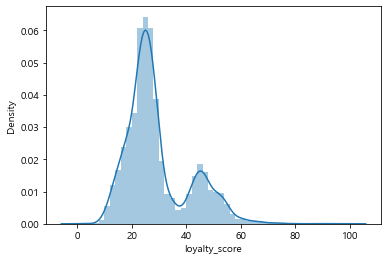

In [5]:
sns.distplot(df_scored['loyalty_score'])

In [6]:
df_scored.to_csv('data/df_scored.csv', index=False, encoding = 'euc-kr')

---
#### 옵션 : 로열티 점수변화에 따른 인원 및 비중 

In [7]:
## 특정 점수(k) 이상일때의 인원수와 비중 구하기 : 원하는 로열티 점수 k를 지정한다. 
k = 30

n = 8230
df_k_scored = df_scored[df_scored['loyalty_score'] >= k]
x = df_k_scored['hp'].value_counts().sum()

print('인원수 =' , x, '명')
print('비중 =' , round(x/n*100, 2), '%')

인원수 = 2489 명
비중 = 30.24 %


---

In [8]:
k = range(0,105, 5)
n_size = []
n_per = []

for i in k: 
    df_k_scored = df_scored[df_scored['loyalty_score'] >= i]
    x = df_k_scored['hp'].value_counts().sum()
    n_size.append(x)

    x2 = round(x/n*100, 2)
    n_per.append(x2) 

In [9]:
k_list = list(k)

df_xxxx = pd.DataFrame(zip(k_list, n_size, n_per), columns = ['L_score', '해당점수 이상 인원수', '%'])
df_xxxx

,L_score,해당점수 이상 인원수,%
0,0,8230,100.00
1,5,8228,99.98
2,10,8206,99.71
3,15,7764,94.34
4,20,6753,82.05
5,25,4690,56.99
6,30,2489,30.24
7,35,1942,23.60
8,40,1735,21.08
9,45,1171,14.23


<AxesSubplot:xlabel='L_score', ylabel='해당점수 이상 인원수'>

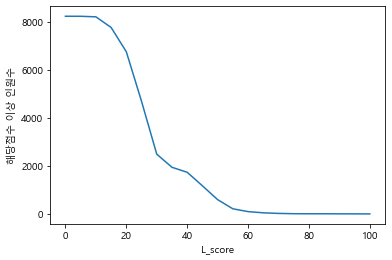

In [10]:
sns.lineplot(data = df_xxxx, x='L_score', y='해당점수 이상 인원수')

In [11]:
## 가정. 로열티 점수 각 60점, 30점을 기준으로 expert / core / beginner 군으로 등급구분 했을 경우 
## 보정되기 전 원본데이터의 tot_sales가 필요하다. 
df_scored_w_raw_sales = pd.read_csv('data/df_scored_w_raw_sales.csv', encoding='euc-kr')

df_expert = df_scored_w_raw_sales[df_scored_w_raw_sales['loyalty_score'] >= 60] 
df_core = df_scored_w_raw_sales[(df_scored_w_raw_sales['loyalty_score'] >= 30) & (df_scored['loyalty_score'] < 60)] 
df_beginner = df_scored_w_raw_sales[df_scored_w_raw_sales['loyalty_score'] < 30] 

In [12]:
print("-Expert의 평균 매출금액 =", round(np.mean(df_expert['raw_tot_sales']), 1))
print("-Core의 평균 매출금액 =", round(np.mean(df_core['raw_tot_sales']), 1))
print("-Beginner의 평균 매출금액 =", round(np.mean(df_beginner['raw_tot_sales']), 1))

-Expert의 평균 매출금액 = 147614646.8
-Core의 평균 매출금액 = 97368864.0
-Beginner의 평균 매출금액 = 54992405.9


In [19]:
df_expert['model_category'].value_counts()

X7        30
X6        17
740Li     11
X5         8
740i       8
iX         4
745Le      4
M8         3
M760Li     3
M5         2
i7         2
840i       1
530i       1
730d       1
740d       1
730Ld      1
Name: model_category, dtype: int64

In [18]:
df_core['model_category'].value_counts()

X5         597
X6         418
X7         355
630i       199
620d        82
X3          77
X4          73
530e        60
iX3         51
740Li       37
740i        36
M340i       32
M550i       31
530i        30
730Ld       30
i4          29
730d        24
M4          23
640i        22
840i        22
M440i       19
M3          15
745e        14
Z4          14
M850i       14
iX          13
540i        10
520i         9
745Le        9
M5           8
740d         8
120i         5
320i         4
840d         4
430i         2
118d         2
220i         2
320d         2
M5(F90)      2
630d         2
523d         1
330e         1
M2           1
320e         1
420d         1
X1           1
Name: model_category, dtype: int64